- Generar datos artificiales mediante bootstraping
- entrenar un xgboost para total destino y total origen

In [ ]:
# TODO: Hacer estas cosas con vainilla trees

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt

seed = 4

In [34]:
data = pd.read_csv('./data/selectedData.csv', index_col='CODIGO_MZ')
data

,datosAgrupados_Total_destino,datosAgrupados_Total_origen,Unidades_Economicas,act_722515,act_722514,act_812110,sum_P_60YMAS_F,sum_P_60YMAS,sum_P_60YMAS_M,sum_POB65_MAS,act_463211,act_722513,sum_P12YM_SEPA,act_465311,act_464113,Paradas_Camion,act_464111
CODIGO_MZ,,,,,,,,,,,,,,,,,
353,5118.0,5118.0,88,0.0,2.0,0.0,40.0,93.0,36.0,42.0,0.0,2.0,105.0,1.0,0.0,9,0.0
352,794.0,794.0,305,1.0,2.0,29.0,678.0,1721.0,583.0,769.0,1.0,1.0,2761.0,17.0,1.0,67,4.0
205,11301.0,11301.0,18,0.0,0.0,0.0,183.0,484.0,132.0,233.0,0.0,0.0,1206.0,1.0,0.0,0,0.0
486,4179.0,4179.0,3,0.0,0.0,0.0,10.0,25.0,9.0,19.0,0.0,0.0,14.0,0.0,0.0,0,0.0
489,781.0,781.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,21667.0,21435.0,354,9.0,14.0,18.0,865.0,1515.0,650.0,1108.0,1.0,16.0,1130.0,10.0,0.0,18,1.0
165,16864.0,16864.0,590,9.0,22.0,56.0,704.0,1410.0,677.0,833.0,17.0,14.0,1026.0,20.0,4.0,27,6.0
151,15936.0,15936.0,235,5.0,9.0,12.0,603.0,1079.0,467.0,740.0,3.0,9.0,737.0,11.0,0.0,5,1.0


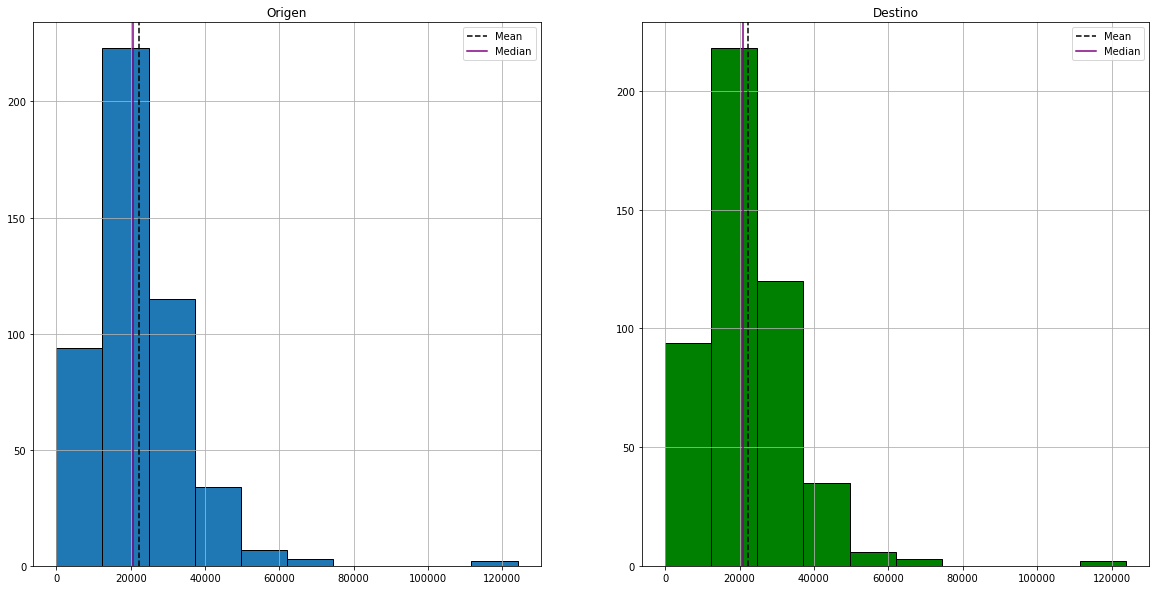

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
x = data['datosAgrupados_Total_origen']
x.hist(ax=ax[0], edgecolor='k')
ax[0].axvline(x.mean(), color = 'k', linestyle='dashed')
ax[0].axvline(x.median(), color = 'purple')
ax[0].legend(['Mean', 'Median'])
ax[0].title.set_text('Origen')
y = data['datosAgrupados_Total_destino']
y.hist(ax=ax[1], color='green', edgecolor='k')
ax[1].axvline(y.mean(), color = 'k', linestyle='dashed')
ax[1].axvline(y.median(), color = 'purple')
ax[1].legend(['Mean', 'Median'])
ax[1].title.set_text('Destino')

In [36]:
x.describe()

count       478.000000
mean      22361.056485
std       13195.192345
min           0.000000
25%       14063.250000
50%       20744.500000
75%       29275.000000
max      124100.000000
Name: datosAgrupados_Total_origen, dtype: float64

In [37]:
y.describe()

count       478.000000
mean      22361.056485
std       13150.519140
min           0.000000
25%       14117.750000
50%       20885.500000
75%       29107.000000
max      123948.000000
Name: datosAgrupados_Total_destino, dtype: float64

In [38]:
# Separar Predictores y variables
targets = ['datosAgrupados_Total_destino', 'datosAgrupados_Total_origen']
predictors = [x for x in data.columns if x not in targets]

In [39]:
df = data.copy()

In [8]:
# Datos sinteticos
for i in range(0, 1000):
    df.loc[1000 + i] = data.sample(279, random_state = seed + i).median()

In [40]:
df

,datosAgrupados_Total_destino,datosAgrupados_Total_origen,Unidades_Economicas,act_722515,act_722514,act_812110,sum_P_60YMAS_F,sum_P_60YMAS,sum_P_60YMAS_M,sum_POB65_MAS,act_463211,act_722513,sum_P12YM_SEPA,act_465311,act_464113,Paradas_Camion,act_464111
CODIGO_MZ,,,,,,,,,,,,,,,,,
353,5118.0,5118.0,88,0.0,2.0,0.0,40.0,93.0,36.0,42.0,0.0,2.0,105.0,1.0,0.0,9,0.0
352,794.0,794.0,305,1.0,2.0,29.0,678.0,1721.0,583.0,769.0,1.0,1.0,2761.0,17.0,1.0,67,4.0
205,11301.0,11301.0,18,0.0,0.0,0.0,183.0,484.0,132.0,233.0,0.0,0.0,1206.0,1.0,0.0,0,0.0
486,4179.0,4179.0,3,0.0,0.0,0.0,10.0,25.0,9.0,19.0,0.0,0.0,14.0,0.0,0.0,0,0.0
489,781.0,781.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,21667.0,21435.0,354,9.0,14.0,18.0,865.0,1515.0,650.0,1108.0,1.0,16.0,1130.0,10.0,0.0,18,1.0
165,16864.0,16864.0,590,9.0,22.0,56.0,704.0,1410.0,677.0,833.0,17.0,14.0,1026.0,20.0,4.0,27,6.0
151,15936.0,15936.0,235,5.0,9.0,12.0,603.0,1079.0,467.0,740.0,3.0,9.0,737.0,11.0,0.0,5,1.0


In [41]:
train, test = train_test_split(df, test_size=0.2, random_state=seed)

In [42]:
X_train, X_test = train[predictors], test[predictors]
y_trainOrigen, y_testOrigen = train['datosAgrupados_Total_origen'], test['datosAgrupados_Total_origen']
y_trainDestino, y_testDestino = train['datosAgrupados_Total_destino'], test['datosAgrupados_Total_destino']

## Origen

In [43]:
#Parámetros para el grid search
gbm_param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5), #porcentaje de variables a elegir cuando construyes tu arbol
     'n_estimators':[100, 200], #número de árboles a crear
     'max_depth': [10, 15, 20, 25] #profundidades
}
#Iniciar el modelo
gbm = xgb.XGBRegressor(objective='reg:squarederror', seed=4)

#Hacer el grid search
grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
#Ajustar a los datos de entrenamiento
grid_mse.fit(X_train, y_trainOrigen)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': [10, 15, 20, 25],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [44]:
print("Mejores hiperparámetros encontrados:",grid_mse.best_params_)

Mejores hiperparámetros encontrados: {'colsample_bytree': 0.9, 'max_depth': 20, 'n_estimators': 200}


In [45]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
modeloOrigen = xgb.XGBRegressor(objective='reg:squarederror',
                            seed=4,
                            max_depth=grid_mse.best_params_['max_depth'],
                            colsample_bytree=grid_mse.best_params_['colsample_bytree'],
                            n_estimators=grid_mse.best_params_['n_estimators'])

#Entrenar modelo
modeloOrigen.fit(X_train, y_trainOrigen)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [46]:
#predecir
y_hatOrigen = modeloOrigen.predict(X_test)

#metricas de performance
r2Origen = metrics.r2_score(y_testOrigen, y_hatOrigen)
mseOrigen = metrics.mean_squared_error(y_testOrigen, y_hatOrigen)
maeOrigen = metrics.mean_absolute_error(y_testOrigen, y_hatOrigen)
print('R2:', r2Origen)
print("MSE:", mseOrigen)
print("MAE:", maeOrigen)

R2: 0.4322925471378729
MSE: 68894110.0800045
MAE: 6010.242398579915


In [16]:
original_train, original_test, y_train, y_test = train_test_split(data[predictors], data['datosAgrupados_Total_origen'], test_size=0.2, random_state=seed)

#Construir y evaluar el XGBoost con los hiperparámetros óptimos
modeloOriginal = xgb.XGBRegressor(objective='reg:squarederror',
                            seed=4,
                            max_depth=grid_mse.best_params_['max_depth'],
                            colsample_bytree=grid_mse.best_params_['colsample_bytree'],
                            n_estimators=grid_mse.best_params_['n_estimators'])

#Entrenar modelo
modeloOriginal.fit(original_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [17]:
#predecir
y_hat = modeloOriginal.predict(original_test)

#metricas de performance
r2Origen = metrics.r2_score(y_test, y_hat)
mseOrigen = metrics.mean_squared_error(y_test, y_hat)
maeOrigen = metrics.mean_absolute_error(y_test, y_hat)
print('R2:', r2Origen)
print("MSE:", mseOrigen)
print("MAE:", maeOrigen)

R2: 0.39915796439997253
MSE: 72915155.7419756
MAE: 6415.591032663981


In [49]:
origenPred = y_testOrigen.to_frame()
origenPred['y_hat'] = y_hatOrigen
origenPred['dif'] = origenPred['datosAgrupados_Total_origen'] - origenPred['y_hat']
origenPred

,datosAgrupados_Total_origen,y_hat,dif
CODIGO_MZ,,,
195,18891.0,22684.500000,-3793.500000
348,1308.0,3827.543701,-2519.543701
367,14029.0,8240.262695,5788.737305
140,16376.0,18415.750000,-2039.750000
8,24704.0,28603.683594,-3899.683594
...,...,...,...
103,24280.0,23642.921875,637.078125
267,21758.0,24172.519531,-2414.519531
485,974.0,4100.559570,-3126.559570


## Destino

In [47]:
#Parámetros para el grid search
gbm_param_grid = {
    'colsample_bytree': np.linspace(0.5, 0.9, 5), #porcentaje de variables a elegir cuando construyes tu arbol
    'n_estimators':[100, 200], #número de árboles a crear
    'max_depth': [10, 15, 20, 25] #profundidades
}
#Iniciar el modelo
gbm = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

#Hacer el grid search
grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
#Ajustar a los datos de entrenamiento
grid_mse.fit(X_train, y_trainDestino)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': [10, 15, 20, 25],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [48]:
print("Mejores hiperparámetros encontrados:",grid_mse.best_params_)

Mejores hiperparámetros encontrados: {'colsample_bytree': 0.6, 'max_depth': 20, 'n_estimators': 200}


In [50]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
modeloDestino = xgb.XGBRegressor(objective='reg:squarederror',
                            seed=4,
                            max_depth=grid_mse.best_params_['max_depth'],
                            colsample_bytree=grid_mse.best_params_['colsample_bytree'],
                            n_estimators=grid_mse.best_params_['n_estimators'])

#Entrenar modelo
modeloDestino.fit(X_train, y_trainDestino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [51]:
#predecir
y_hatDestino = modeloDestino.predict(X_test)

#metricas de performance
r2Destino = metrics.r2_score(y_testDestino, y_hatDestino)
mseDestino = metrics.mean_squared_error(y_testDestino, y_hatDestino)
maeDestino = metrics.mean_absolute_error(y_testDestino, y_hatDestino)
print('R2:', r2Destino)
print("MSE:", mseDestino)
print("MAE:", maeDestino)

R2: 0.3091642273134242
MSE: 81872620.53897308
MAE: 6672.867521921794


In [52]:
destinoPred = y_testDestino.to_frame()
destinoPred['y_hat'] = y_hatDestino
destinoPred['dif'] = destinoPred['datosAgrupados_Total_destino'] - destinoPred['y_hat']
destinoPred

,datosAgrupados_Total_destino,y_hat,dif
CODIGO_MZ,,,
195,18890.0,24085.435547,-5195.435547
348,1308.0,3136.364746,-1828.364746
367,14003.0,9644.209961,4358.790039
140,16376.0,17444.271484,-1068.271484
8,25008.0,25280.101562,-272.101562
...,...,...,...
103,24343.0,21274.857422,3068.142578
267,21499.0,19803.148438,1695.851562
485,974.0,4231.655273,-3257.655273


# Next
- Revisar codigo por errores de dataframe y proceso de entrenamiento
- Escalar variable objetivo standar scaler
- bootstrap manual
- one hot encode del codigomz
- reducir a 10 variables

### 26-10-2023

- Quitar variables de población y sustituir por población total
- Quedarse solo con 3 de las actividades economicas
- quedarse con unidades economicas totales y paradas de camion
- Sacar porcentaje de viviendas con automovil y añadirlo

- Crear dos modelos, uno con CODIGO_MZ y uno sin ella

# Modelos con Codigo_MZ

In [24]:
dataC = pd.read_csv('./data/selectedDataV2_WithDummies.csv', index_col='CODIGO_MZ')
dataC

,datosAgrupados_Total_destino,datosAgrupados_Total_origen,sum_POBTOT,act_722515,act_722514,act_812110,Unidades_Economicas,Paradas_Camion,%VPH_AUTOMOVIL,1,...,469,470,471,484,485,486,487,488,489,490
CODIGO_MZ,,,,,,,,,,,,,,,,,,,,,
353,5118.0,5118.0,1541.0,0.0,2.0,0.0,88,9,0.527174,0,...,0,0,0,0,0,0,0,0,0,0
352,794.0,794.0,46710.0,1.0,2.0,29.0,305,67,0.633977,0,...,0,0,0,0,0,0,0,0,0,0
205,11301.0,11301.0,17780.0,0.0,0.0,0.0,18,0,0.377477,0,...,0,0,0,0,0,0,0,0,0,0
486,4179.0,4179.0,196.0,0.0,0.0,0.0,3,0,0.452830,0,...,0,0,0,0,0,1,0,0,0,0
489,781.0,781.0,0.0,0.0,0.0,0.0,0,0,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,21667.0,21435.0,8937.0,9.0,14.0,18.0,354,18,0.513158,0,...,0,0,0,0,0,0,0,0,0,0
165,16864.0,16864.0,10644.0,9.0,22.0,56.0,590,27,0.575826,0,...,0,0,0,0,0,0,0,0,0,0
151,15936.0,15936.0,5937.0,5.0,9.0,12.0,235,5,0.562186,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
trainC, testC = train_test_split(dataC, test_size=0.2, random_state=seed)

In [26]:
predictorsC = [x for x in dataC.columns if x not in targets]

In [27]:
X_trainC, X_testC = trainC[predictorsC], testC[predictorsC]
y_trainOrigenC, y_testOrigenC = trainC['datosAgrupados_Total_origen'], testC['datosAgrupados_Total_origen']
y_trainDestinoC, y_testDestinoC = trainC['datosAgrupados_Total_destino'], testC['datosAgrupados_Total_destino']

### Origen

In [28]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
modeloOrigenC = xgb.XGBRegressor(objective='reg:squarederror', seed=4)

#Entrenar modelo
modeloOrigenC.fit(X_trainC, y_trainOrigenC)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [29]:
#predecir
y_hatOrigenC = modeloOrigenC.predict(X_testC)

#metricas de performance
r2OrigenC = metrics.r2_score(y_testOrigenC, y_hatOrigenC)
mseOrigenC = metrics.mean_squared_error(y_testOrigenC, y_hatOrigenC)
maeOrigenC = metrics.mean_absolute_error(y_testOrigenC, y_hatOrigenC)
print('R2:', r2OrigenC)
print("MSE:", mseOrigenC)
print("MAE:", maeOrigenC)

R2: 0.4459228255414336
MSE: 67240008.31329037
MAE: 6172.798405965169


In [30]:
origenPredC = y_testOrigenC.to_frame()
origenPredC['y_hat'] = y_hatOrigenC
origenPredC['dif'] = origenPredC['datosAgrupados_Total_origen'] - origenPredC['y_hat']
origenPredC

,datosAgrupados_Total_origen,y_hat,dif
CODIGO_MZ,,,
195,18891.0,16020.137695,2870.862305
348,1308.0,5021.514160,-3713.514160
367,14029.0,12700.125977,1328.874023
140,16376.0,19495.666016,-3119.666016
8,24704.0,25820.966797,-1116.966797
...,...,...,...
103,24280.0,19294.384766,4985.615234
267,21758.0,21357.414062,400.585938
485,974.0,3307.706299,-2333.706299


### Destino

In [31]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
modeloDestinoC = xgb.XGBRegressor(objective='reg:squarederror', seed=4)

#Entrenar modelo
modeloDestinoC.fit(X_trainC, y_trainDestinoC)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [32]:
#predecir
y_hatDestinoC = modeloDestinoC.predict(X_testC)

#metricas de performance
r2DestinoC = metrics.r2_score(y_testDestinoC, y_hatDestinoC)
mseDestinoC = metrics.mean_squared_error(y_testDestinoC, y_hatDestinoC)
maeDestinoC = metrics.mean_absolute_error(y_testDestinoC, y_hatDestinoC)
print('R2:', r2DestinoC)
print("MSE:", mseDestinoC)
print("MAE:", maeDestinoC)

R2: 0.460460517585376
MSE: 63942130.75814106
MAE: 5986.5102704366045


In [33]:
destinoPredC = y_testDestinoC.to_frame()
destinoPredC['y_hat'] = y_hatDestinoC
destinoPredC['dif'] = destinoPredC['datosAgrupados_Total_destino'] - destinoPredC['y_hat']
destinoPredC

,datosAgrupados_Total_destino,y_hat,dif
CODIGO_MZ,,,
195,18890.0,16073.441406,2816.558594
348,1308.0,4009.072754,-2701.072754
367,14003.0,15585.824219,-1582.824219
140,16376.0,16246.731445,129.268555
8,25008.0,25229.953125,-221.953125
...,...,...,...
103,24343.0,17647.791016,6695.208984
267,21499.0,20974.669922,524.330078
485,974.0,3886.303711,-2912.303711
